In [ ]:
print("importing required libraries")
import pandas as pd
import numpy as np
import ast
import time
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

importing required libraries


In [ ]:
!unzip 'Geographical_customer_data.zip'

Archive:  Geographical_customer_data.zip
  inflating: Geographical_customer_data.csv  


In [ ]:
df_data=pd.read_csv('/content/Geographical_customer_data.csv')

In [ ]:
df_data.head(5)

,Unnamed: 0,CustomerID,Country,Region_State
0,0,17850.0,United Kingdom,Wales
1,9,13047.0,United Kingdom,Scotland
2,26,12583.0,France,Mulhouse
3,46,13748.0,United Kingdom,England
4,65,15100.0,United Kingdom,England


In [ ]:
df_data.isnull().sum()

Unnamed: 0      0
CustomerID      0
Country         0
Region_State    0
dtype: int64

In [ ]:
del df_data['Unnamed: 0']

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

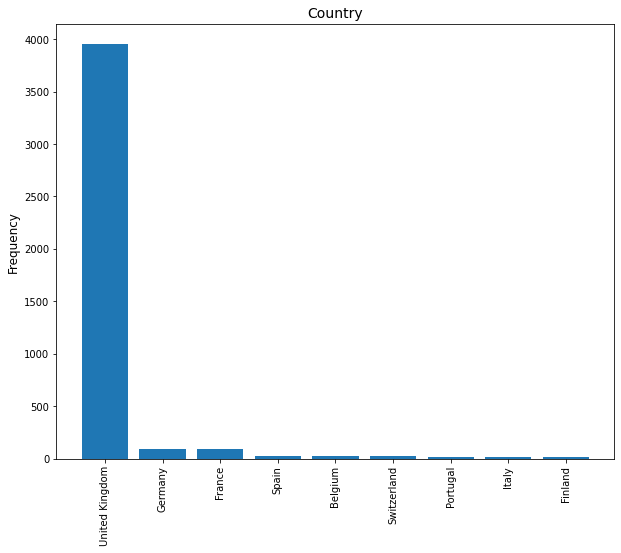

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(df_data["Country"].value_counts().index,
        df_data["Country"].value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Country", size = 14)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 <a list of 26 Text major ticklabel objects>)

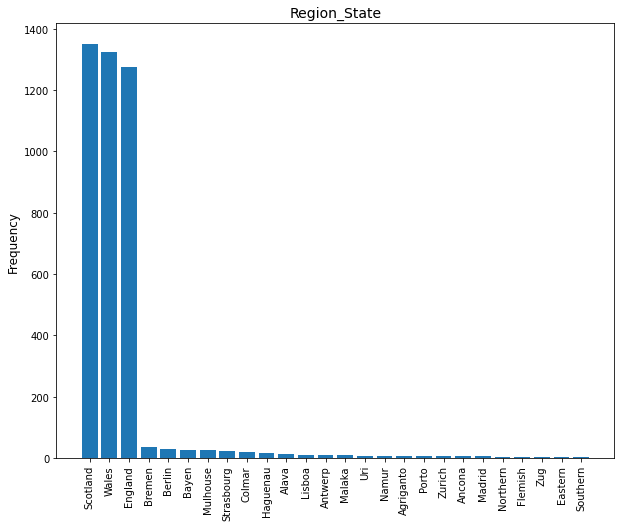

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(df_data["Region_State"].value_counts().index,
        df_data["Region_State"].value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Region_State", size = 14)
plt.xticks(rotation=90)

In [ ]:
len(df_data)

4251

In [ ]:
df_data.head(5)

,CustomerID,Country,Region_State
0,17850.0,United Kingdom,Wales
1,13047.0,United Kingdom,Scotland
2,12583.0,France,Mulhouse
3,13748.0,United Kingdom,England
4,15100.0,United Kingdom,England


In [ ]:
df_data_vals=df_data

In [ ]:
df_data.Country=df_data.Country.astype('category').cat.codes

In [ ]:
df_data.Region_State=df_data.Region_State.astype('category').cat.codes

In [ ]:
df_data.head(5)

,CustomerID,Country,Region_State
0,17850.0,8,23
1,13047.0,8,19
2,12583.0,2,15
3,13748.0,8,9
4,15100.0,8,9


In [ ]:
df_data_values=df_data

In [ ]:
from numpy import unique
from numpy import where
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()                                         
df_scaled = scaler.fit_transform(df_data)

In [ ]:
df_scaled

array([[ 1.47039536,  0.25707092,  1.03271669],
       [-1.36197271,  0.25707092,  0.38430392],
       [-1.63559728, -4.20944884, -0.26410885],
       ...,
       [-1.21395598,  0.25707092,  1.03271669],
       [-0.46443696,  0.25707092,  0.38430392],
       [-1.55893522, -3.46502888, -1.72303758]])

In [ ]:
wcss_1 = []                                     
range_values = range(1, 10)                    
for i in range_values:                        
  kmeans = KMeans(n_clusters=i)                 
  kmeans.fit(df_scaled)            
  wcss_1.append(kmeans.inertia_)

In [ ]:
kmeans = KMeans(n_clusters=3)           
kmeans.fit(df_scaled)         
labels = kmeans.labels_

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_data.columns])
cluster_centers

,CustomerID,Country,Region_State
0,0.074007,0.223986,-1.238964
1,0.113046,0.251544,0.708450
2,-1.591769,-3.849055,-1.157606


In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_data.columns])
cluster_centers

,CustomerID,Country,Region_State
0,15482.068199,7.955556,8.986207
1,15548.269859,7.992576,20.999629
2,12657.321429,2.484127,9.488095


In [ ]:
df_mk_cluster = pd.concat([df_data, pd.DataFrame({'cluster': labels})], axis = 1) 
df_mk_cluster.head()

,CustomerID,Country,Region_State,cluster
0,17850.0,8,23,1
1,13047.0,8,19,1
2,12583.0,2,15,2
3,13748.0,8,9,0
4,15100.0,8,9,0


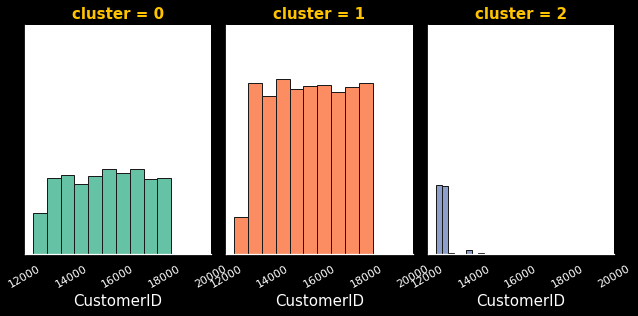

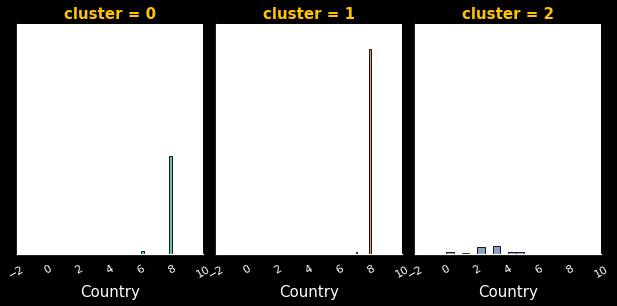

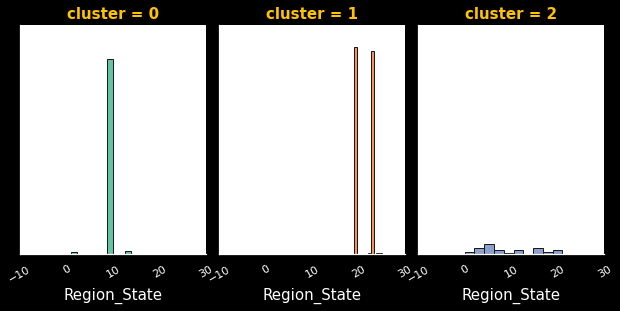

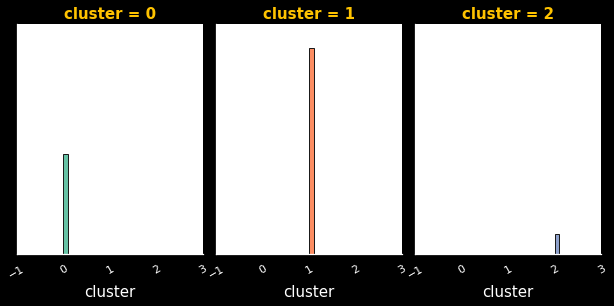

In [ ]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'black', 'axes.grid' : False})

for i in df_mk_cluster:
    g = sns.FacetGrid(df_mk_cluster, col = "cluster", hue = "cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5);

In [ ]:
df_mk_cluster['freq_count_mk'] = df_mk_cluster.groupby('cluster')['cluster'].transform('count')
df_mk_cluster['score_ranked_mk']=df_mk_cluster['freq_count_mk'].rank(ascending=0,method='dense')
df_mk_cluster

,CustomerID,Country,Region_State,cluster,freq_count_mk,score_ranked_mk
0,17850.0,8,23,1,2694,1.0
1,13047.0,8,19,1,2694,1.0
2,12583.0,2,15,2,252,3.0
3,13748.0,8,9,0,1305,2.0
4,15100.0,8,9,0,1305,2.0
...,...,...,...,...,...,...
4246,13436.0,8,19,1,2694,1.0
4247,15520.0,8,9,0,1305,2.0
4248,13298.0,8,23,1,2694,1.0
4249,14569.0,8,19,1,2694,1.0


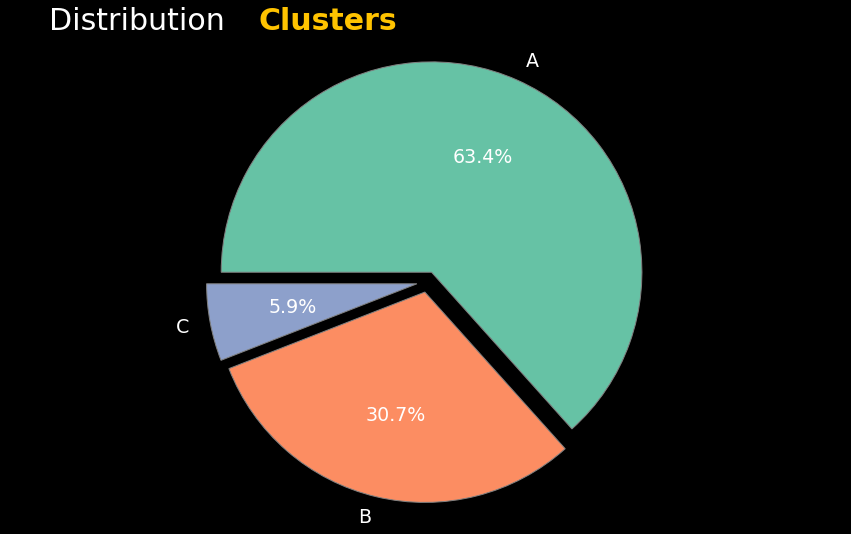

In [ ]:
clusters_count = df_mk_cluster['score_ranked_mk'].value_counts()                       
clusters_count = clusters_count.to_frame().reset_index()                      
clusters_count.columns = ['clusters', 'count']                               
clusters_count = clusters_count.sort_values('clusters', ascending = True)     

labels = [
        "A", 
        "B", 
        "C"
        ]

plt.figure(figsize=(15,9))
# mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:5]
plt.pie(clusters_count['count'], 
        explode=(0.05, 0.05, 0.05), 
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth':1}
        )

plt.axis('equal')
plt.text(-0.8, 1.2, "Clusters", size=30, color="#FFC300", fontweight="bold")
plt.text(-1.8, 1.2, "Distribution", size=30, color="white")
plt.show();

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

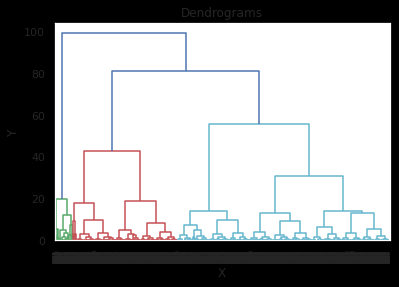

In [ ]:
dendrograma = dendrogram(linkage(df_scaled, method='ward'))
plt.title('Dendrograms')
plt.xlabel('X')
plt.ylabel('Y');

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hc_g = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'ward')
rotulos = hc_g.fit_predict(df_scaled)

In [ ]:

df_ag_cluster = pd.concat([df_data, pd.DataFrame({'cluster': rotulos})], axis = 1) 
df_ag_cluster.head()

,CustomerID,Country,Region_State,cluster
0,17850.0,8,23,0
1,13047.0,8,19,0
2,12583.0,2,15,1
3,13748.0,8,9,2
4,15100.0,8,9,2


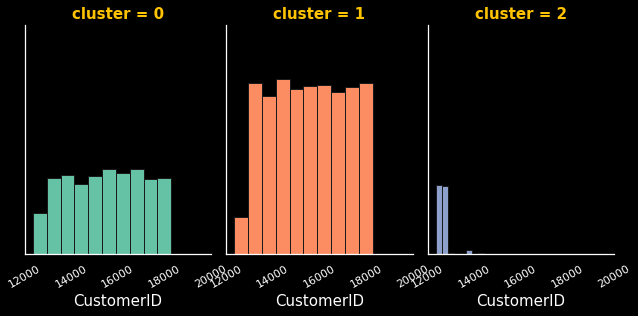

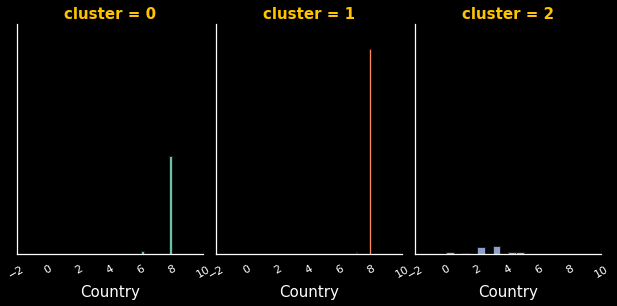

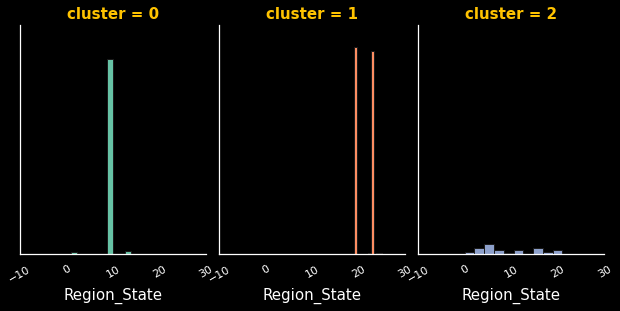

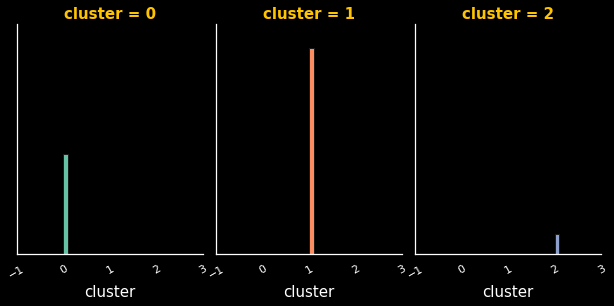

In [ ]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

for i in df_ag_cluster:
    g = sns.FacetGrid(df_mk_cluster, col = "cluster", hue = "cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5);

In [ ]:
df_ag_cluster['freq_count_ag'] = df_ag_cluster.groupby('cluster')['cluster'].transform('count')
df_ag_cluster['score_ranked_ag']=df_ag_cluster['freq_count_ag'].rank(ascending=0,method='dense')
df_ag_cluster

,CustomerID,Country,Region_State,cluster,freq_count_ag,score_ranked_ag
0,17850.0,8,23,0,2694,1.0
1,13047.0,8,19,0,2694,1.0
2,12583.0,2,15,1,233,3.0
3,13748.0,8,9,2,1324,2.0
4,15100.0,8,9,2,1324,2.0
...,...,...,...,...,...,...
4246,13436.0,8,19,0,2694,1.0
4247,15520.0,8,9,2,1324,2.0
4248,13298.0,8,23,0,2694,1.0
4249,14569.0,8,19,0,2694,1.0


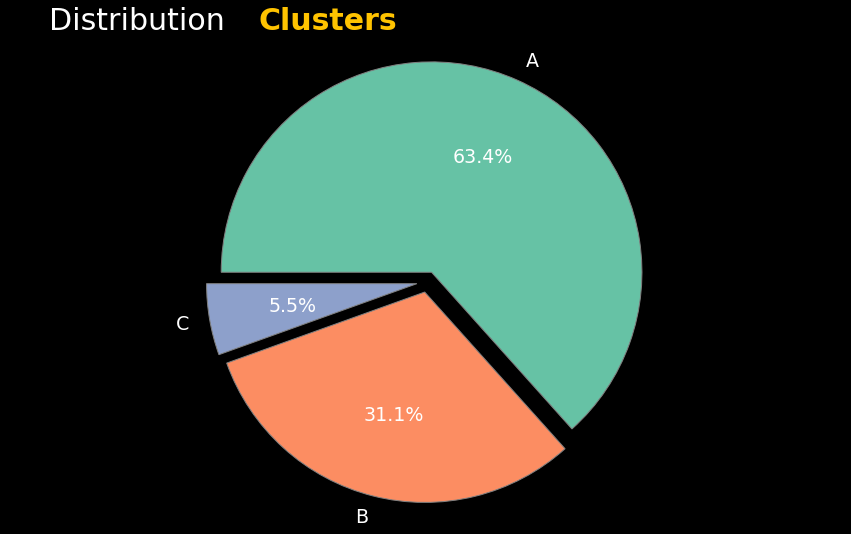

In [ ]:
clusters_count = df_ag_cluster['score_ranked_ag'].value_counts()                       
clusters_count = clusters_count.to_frame().reset_index()                      
clusters_count.columns = ['clusters', 'count']                               
clusters_count = clusters_count.sort_values('clusters', ascending = True)     

labels = [
        "A", 
        "B", 
        "C"
        ]

plt.figure(figsize=(15,9))
# mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:5]
plt.pie(clusters_count['count'], 
        explode=(0.05, 0.05, 0.05), 
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth':1}
        )

plt.axis('equal')
plt.text(-0.8, 1.2, "Clusters", size=30, color="#FFC300", fontweight="bold")
plt.text(-1.8, 1.2, "Distribution", size=30, color="white")
plt.show();

In [ ]:
from sklearn.cluster import Birch

In [ ]:
brc = Birch(branching_factor=50, n_clusters=3, threshold=1.3)
brc.fit(df_scaled)

Birch(threshold=1.3)

In [ ]:
labels = brc.predict(df_scaled)
labels

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:

df_bc_cluster = pd.concat([df_data, pd.DataFrame({'cluster': labels})], axis = 1) 
df_bc_cluster.head()

,CustomerID,Country,Region_State,cluster
0,17850.0,8,23,1
1,13047.0,8,19,1
2,12583.0,2,15,0
3,13748.0,8,9,2
4,15100.0,8,9,2


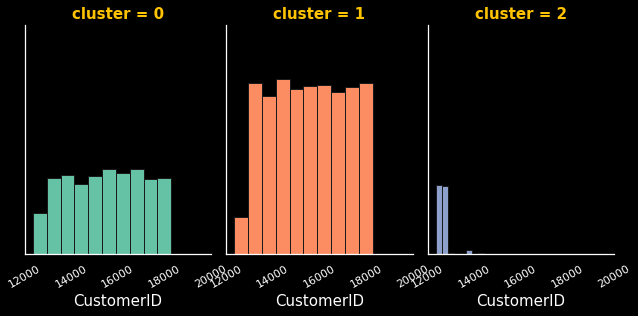

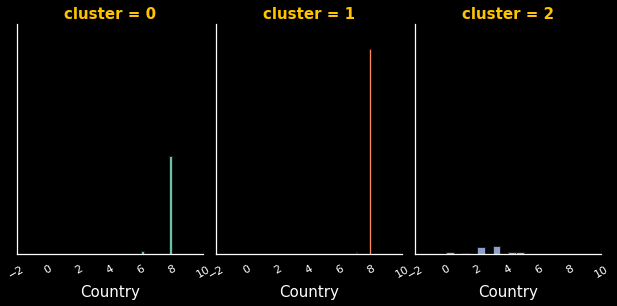

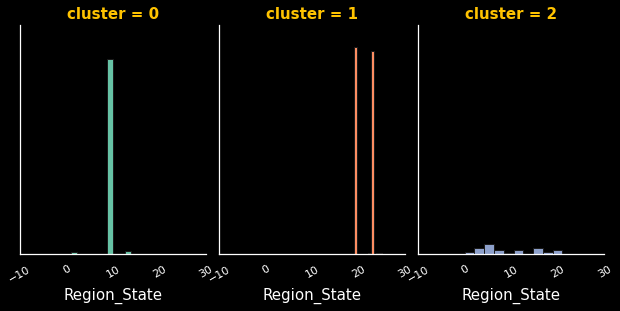

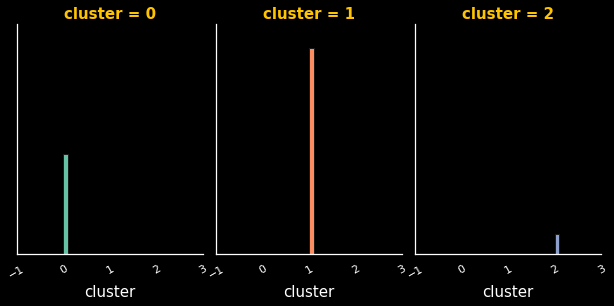

In [ ]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

for i in df_bc_cluster:
    g = sns.FacetGrid(df_mk_cluster, col = "cluster", hue = "cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5);

In [ ]:
df_bc_cluster['freq_count_bc'] = df_bc_cluster.groupby('cluster')['cluster'].transform('count')
df_bc_cluster['score_ranked_bc']=df_bc_cluster['freq_count_bc'].rank(ascending=0,method='dense')
df_bc_cluster

,CustomerID,Country,Region_State,cluster,freq_count_bc,score_ranked_bc
0,17850.0,8,23,1,2718,1.0
1,13047.0,8,19,1,2718,1.0
2,12583.0,2,15,0,245,3.0
3,13748.0,8,9,2,1288,2.0
4,15100.0,8,9,2,1288,2.0
...,...,...,...,...,...,...
4246,13436.0,8,19,1,2718,1.0
4247,15520.0,8,9,2,1288,2.0
4248,13298.0,8,23,1,2718,1.0
4249,14569.0,8,19,1,2718,1.0


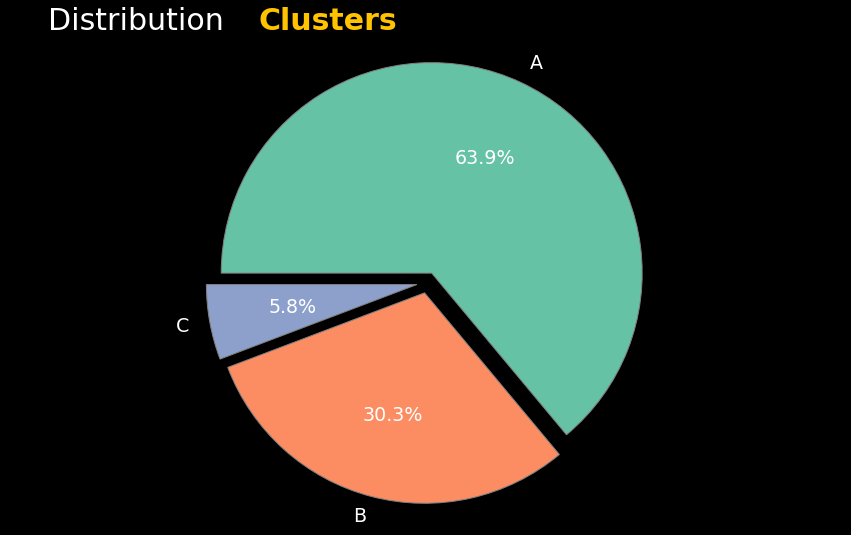

In [ ]:
clusters_count = df_bc_cluster['score_ranked_bc'].value_counts()                                              
clusters_count = clusters_count.to_frame().reset_index()                      
clusters_count.columns = ['clusters', 'count']                               
clusters_count = clusters_count.sort_values('clusters', ascending = True)     

labels = [
        "A", 
        "B", 
        "C"
        ]

plt.figure(figsize=(15,9))
# mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:5]
plt.pie(clusters_count['count'], 
        explode=(0.05, 0.05, 0.05), 
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth':1}
        )

plt.axis('equal')
plt.text(-0.8, 1.2, "Clusters", size=30, color="#FFC300", fontweight="bold")
plt.text(-1.8, 1.2, "Distribution", size=30, color="white")
plt.show();

In [ ]:
from sklearn.cluster import MeanShift
ms = MeanShift(min_bin_freq=50000 ,cluster_all=True)
ms.fit(df_scaled)
cluster_centers = ms.cluster_centers_
labels = ms.predict(df_scaled)
labels

array([0, 0, 2, ..., 0, 0, 2])

In [ ]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=3)
sc.fit(df_scaled)

labels = sc.fit_predict(df_scaled)
labels

array([0, 0, 1, ..., 0, 0, 1], dtype=int32)

In [ ]:
set(labels)

{0, 1, 2}

In [ ]:
df_sc_cluster = pd.concat([df_data, pd.DataFrame({'cluster': labels})], axis = 1) 
df_sc_cluster.head()

,CustomerID,Country,Region_State,cluster
0,17850.0,8,23,0
1,13047.0,8,19,0
2,12583.0,2,15,1
3,13748.0,8,9,2
4,15100.0,8,9,2


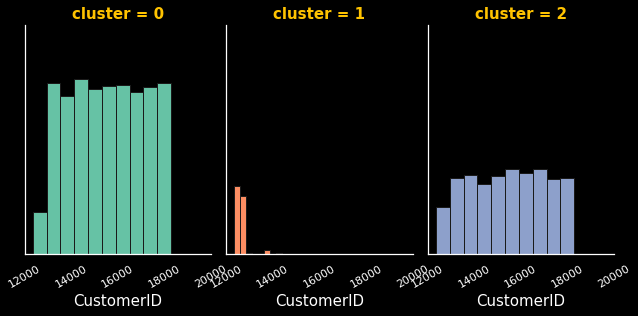

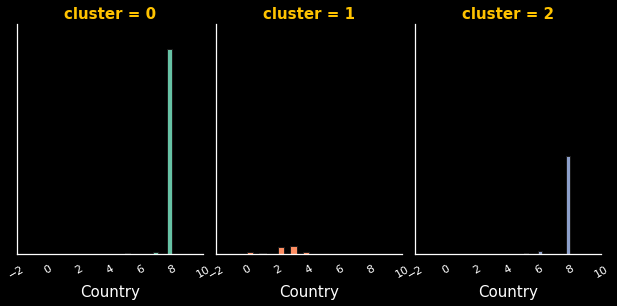

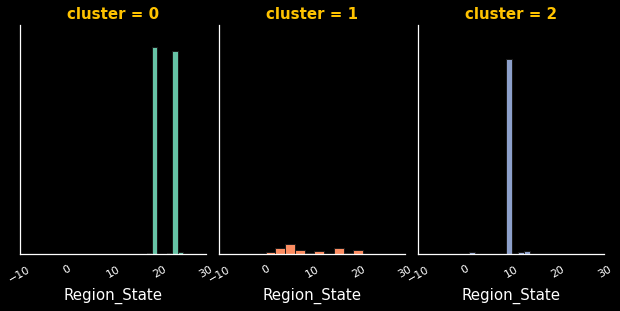

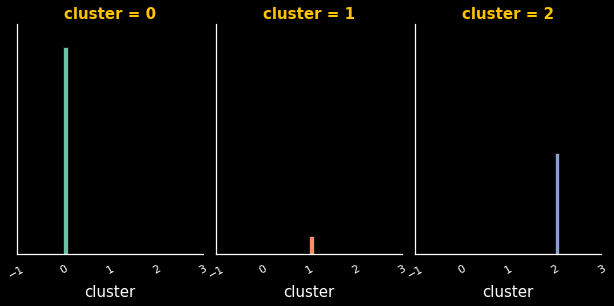

In [ ]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

for i in df_sc_cluster:
    g = sns.FacetGrid(df_sc_cluster, col = "cluster", hue = "cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5);

In [ ]:
df_sc_cluster['freq_count_sc'] = df_sc_cluster.groupby('cluster')['cluster'].transform('count')
df_sc_cluster['score_ranked_sc']=df_sc_cluster['freq_count_sc'].rank(ascending=0,method='dense')
df_sc_cluster

,CustomerID,Country,Region_State,cluster,freq_count_sc,score_ranked_sc
0,17850.0,8,23,0,2703,1.0
1,13047.0,8,19,0,2703,1.0
2,12583.0,2,15,1,233,3.0
3,13748.0,8,9,2,1315,2.0
4,15100.0,8,9,2,1315,2.0
...,...,...,...,...,...,...
4246,13436.0,8,19,0,2703,1.0
4247,15520.0,8,9,2,1315,2.0
4248,13298.0,8,23,0,2703,1.0
4249,14569.0,8,19,0,2703,1.0


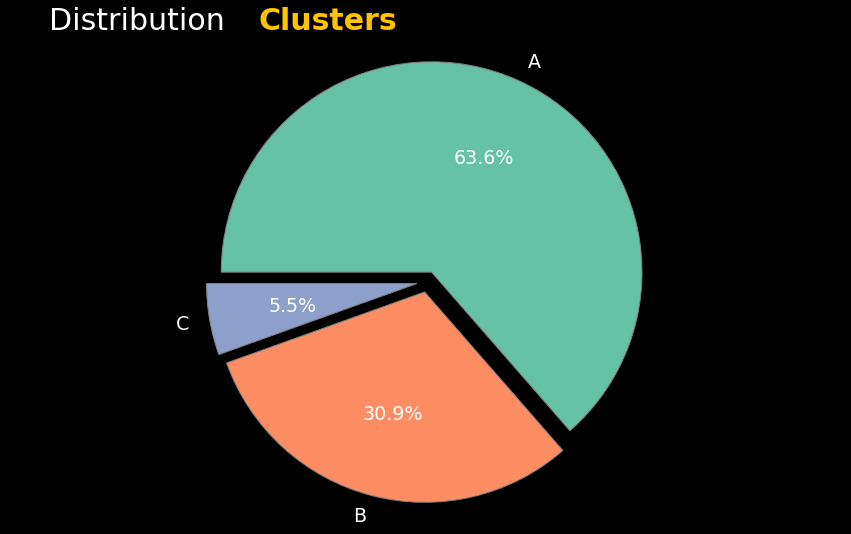

In [ ]:
clusters_count = df_sc_cluster['score_ranked_sc'].value_counts()                       
clusters_count = clusters_count.to_frame().reset_index()                      
clusters_count.columns = ['clusters', 'count']                               
clusters_count = clusters_count.sort_values('clusters', ascending = True)     

labels = [
        "A", 
        "B", 
        "C"
        
        ]

plt.figure(figsize=(15,9))
# mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:5]
plt.pie(clusters_count['count'], 
        explode=(0.05, 0.05, 0.05), 
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth':1}
        )

plt.axis('equal')
plt.text(-0.8, 1.2, "Clusters", size=30, color="#FFC300", fontweight="bold")
plt.text(-1.8, 1.2, "Distribution", size=30, color="white")
plt.show();

In [ ]:
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(df_scaled)
	kmeanModel.fit(df_scaled)

	distortions.append(sum(np.min(cdist(df_scaled, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / df_scaled.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(df_scaled, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / df_scaled.shape[0]
	mapping2[k] = kmeanModel.inertia_


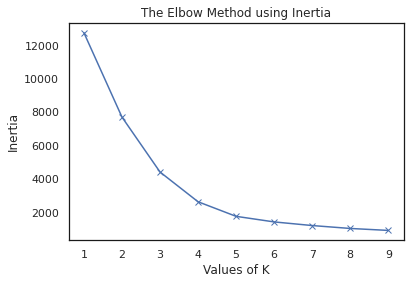

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


In [ ]:
unique_colors = set(dendrograma['color_list'])
print(len(unique_colors) -1)

3


In [ ]:
df_mk_cluster.head()

,CustomerID,Country,Region_State,cluster,freq_count_mk,score_ranked_mk
0,17850.0,8,23,1,2694,1.0
1,13047.0,8,19,1,2694,1.0
2,12583.0,2,15,2,252,3.0
3,13748.0,8,9,0,1305,2.0
4,15100.0,8,9,0,1305,2.0


In [ ]:
df_mk_cluster['freq_count_mk'] = df_mk_cluster.groupby('cluster')['cluster'].transform('count')


In [ ]:
df_mk_cluster['score_ranked_mk']=df_mk_cluster['freq_count_mk'].rank(ascending=0,method='dense')

In [ ]:
df_mk_cluster

,CustomerID,Country,Region_State,cluster,freq_count_mk,score_ranked_mk
0,17850.0,8,23,1,2694,1.0
1,13047.0,8,19,1,2694,1.0
2,12583.0,2,15,2,252,3.0
3,13748.0,8,9,0,1305,2.0
4,15100.0,8,9,0,1305,2.0
...,...,...,...,...,...,...
4246,13436.0,8,19,1,2694,1.0
4247,15520.0,8,9,0,1305,2.0
4248,13298.0,8,23,1,2694,1.0
4249,14569.0,8,19,1,2694,1.0


In [ ]:
df_bc_cluster['freq_count_bc'] = df_bc_cluster.groupby('cluster')['cluster'].transform('count')
df_bc_cluster['score_ranked_bc']=df_bc_cluster['freq_count_bc'].rank(ascending=0,method='dense')
df_bc_cluster

,CustomerID,Country,Region_State,cluster,freq_count_bc,score_ranked_bc
0,17850.0,8,23,1,2718,1.0
1,13047.0,8,19,1,2718,1.0
2,12583.0,2,15,0,245,3.0
3,13748.0,8,9,2,1288,2.0
4,15100.0,8,9,2,1288,2.0
...,...,...,...,...,...,...
4246,13436.0,8,19,1,2718,1.0
4247,15520.0,8,9,2,1288,2.0
4248,13298.0,8,23,1,2718,1.0
4249,14569.0,8,19,1,2718,1.0


In [ ]:
df_ag_cluster['freq_count_ag'] = df_ag_cluster.groupby('cluster')['cluster'].transform('count')
df_ag_cluster['score_ranked_ag']=df_ag_cluster['freq_count_ag'].rank(ascending=0,method='dense')
df_ag_cluster

,CustomerID,Country,Region_State,cluster,freq_count_ag,score_ranked_ag
0,17850.0,8,23,0,2694,1.0
1,13047.0,8,19,0,2694,1.0
2,12583.0,2,15,1,233,3.0
3,13748.0,8,9,2,1324,2.0
4,15100.0,8,9,2,1324,2.0
...,...,...,...,...,...,...
4246,13436.0,8,19,0,2694,1.0
4247,15520.0,8,9,2,1324,2.0
4248,13298.0,8,23,0,2694,1.0
4249,14569.0,8,19,0,2694,1.0


In [ ]:
df_sc_cluster['freq_count_sc'] = df_sc_cluster.groupby('cluster')['cluster'].transform('count')
df_sc_cluster['score_ranked_sc']=df_sc_cluster['freq_count_sc'].rank(ascending=0,method='dense')
df_sc_cluster

,CustomerID,Country,Region_State,cluster,freq_count_sc,score_ranked_sc
0,17850.0,8,23,0,2703,1.0
1,13047.0,8,19,0,2703,1.0
2,12583.0,2,15,1,233,3.0
3,13748.0,8,9,2,1315,2.0
4,15100.0,8,9,2,1315,2.0
...,...,...,...,...,...,...
4246,13436.0,8,19,0,2703,1.0
4247,15520.0,8,9,2,1315,2.0
4248,13298.0,8,23,0,2703,1.0
4249,14569.0,8,19,0,2703,1.0


In [ ]:
df_ag_cluster=df_ag_cluster[['CustomerID','score_ranked_ag']]
df_bc_cluster=df_bc_cluster[['CustomerID','score_ranked_bc']]
df_sc_cluster=df_sc_cluster[['CustomerID','score_ranked_sc']]
df_mk_cluster=df_mk_cluster[['CustomerID','score_ranked_mk']]
df_final=df_bc_cluster.merge(df_ag_cluster,on=['CustomerID'],how='inner')
df_final=df_final.dropna()
df_final=df_final.merge(df_sc_cluster,on=['CustomerID'],how='inner')
df_final=df_final.dropna()
df_final=df_final.merge(df_mk_cluster,on=['CustomerID'],how='inner')
df_final=df_final.dropna()

In [ ]:
opts = ['score_ranked_mk','score_ranked_sc','score_ranked_bc','score_ranked_ag']

df_final['final_cluster']=df_final[opts].mode(axis=1)[0]


In [ ]:
df_final_clus=df_final.merge(df_data_vals,how='left',on=['CustomerID'])

In [ ]:
df_final_clus[df_final_clus['final_cluster']==1.0].mode().head(1)

,CustomerID,score_ranked_bc,score_ranked_ag,score_ranked_sc,score_ranked_mk,final_cluster,Country,Region_State
0,12346.0,1.0,1.0,1.0,1.0,1.0,United Kingdom,Scotland


In [ ]:
df_final_clus[df_final_clus['final_cluster']==2.0].mode().head(1)

,CustomerID,score_ranked_bc,score_ranked_ag,score_ranked_sc,score_ranked_mk,final_cluster,Country,Region_State
0,12354.0,2.0,2.0,2.0,2.0,2.0,United Kingdom,England


In [ ]:
df_final_clus[df_final_clus['final_cluster']==3.0].mode().head(1)

,CustomerID,score_ranked_bc,score_ranked_ag,score_ranked_sc,score_ranked_mk,final_cluster,Country,Region_State
0,12348.0,3.0,3.0,3.0,3.0,3.0,Germany,Bremen


In [ ]:
d1=df_final[df_final['score_ranked_mk']==df_final['score_ranked_ag']]

In [ ]:
d2=df_final[df_final['score_ranked_sc']==df_final['score_ranked_bc']]

In [ ]:
d1=d1.merge(d2, on=['CustomerID',	'score_ranked_mk',	'score_ranked_sc',	'score_ranked_ag',	'score_ranked_bc',	'final_cluster'])

In [ ]:
len(d1)/len(df_final)*100.0

99.176664314279

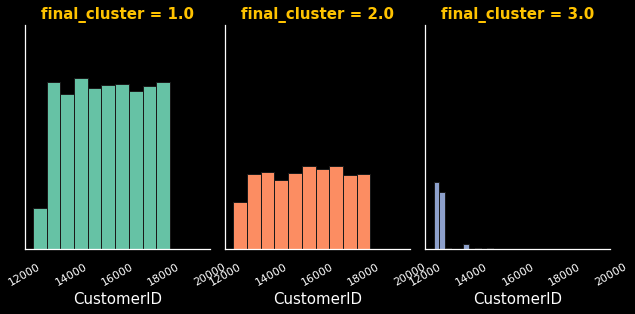

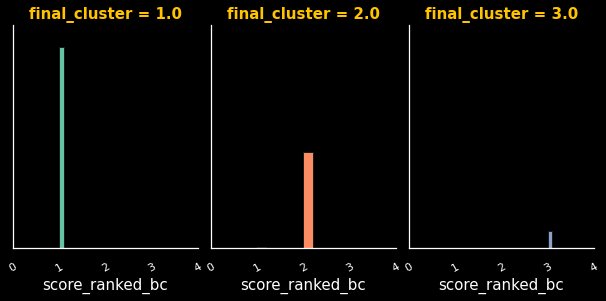

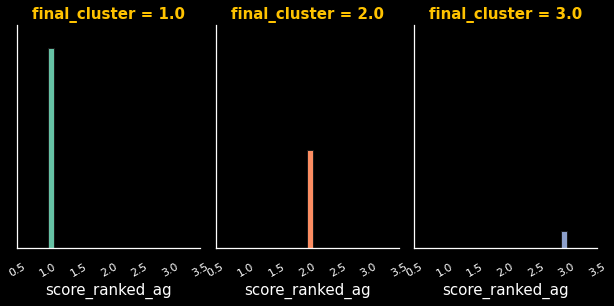

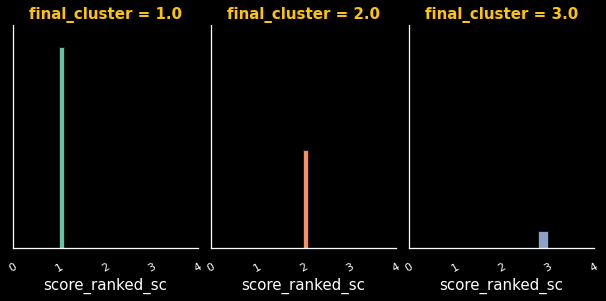

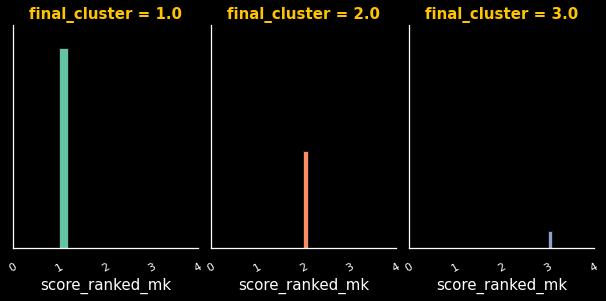

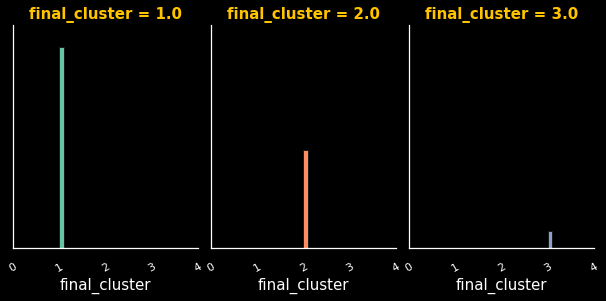

In [ ]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

for i in df_final:
    g = sns.FacetGrid(df_final, col = "final_cluster", hue = "final_cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5);

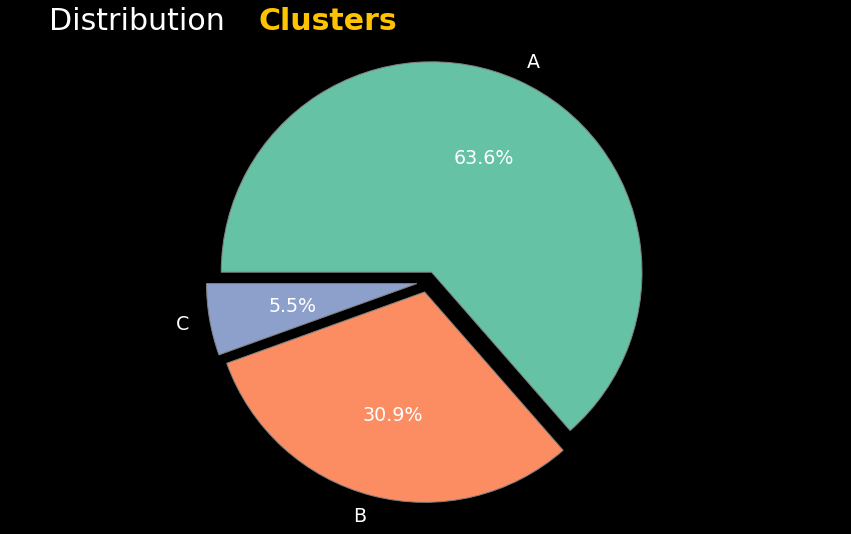

In [ ]:
clusters_count = df_final['final_cluster'].value_counts()                       
clusters_count = clusters_count.to_frame().reset_index()                      
clusters_count.columns = ['clusters', 'count']                               
clusters_count = clusters_count.sort_values('clusters', ascending = True)     

labels = [
        "A", 
        "B", 
        "C"
        ]

plt.figure(figsize=(15,9))
# mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:5]
plt.pie(clusters_count['count'], 
        explode=(0.05, 0.05, 0.05), 
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth':1}
        )

plt.axis('equal')
plt.text(-0.8, 1.2, "Clusters", size=30, color="#FFC300", fontweight="bold")
plt.text(-1.8, 1.2, "Distribution", size=30, color="white")
plt.show();